In [2]:
pip list

Package                            Version                Location
---------------------------------- ---------------------- ------------------------------------------------------------------------------------------
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 1.9.12
anaconda-project                   0.8.3
applaunchservices                  0.2.1
appnope                            0.1.0
appscript                          1.1.1
argh                               0.26.2
asn1crypto                         1.3.0
astroid                            2.4.2
astropy                            4.0.1.post1
atomicwrites                       1.4.0
attrs                              19.3.0
autopep8                           1.5.3
Babel                              2.8.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.1
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1

In [3]:
pip install tensorflow

  Using cached tensorflow-2.4.1-cp38-cp38-macosx_10_11_x86_64.whl (173.9 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached grpcio-1.32.0-cp38-cp38-macosx_10_9_x86_64.whl (3.3 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
  Using cached wrapt-1.12.1-cp38-cp38-macosx_10_9_x86_64.whl
  Using cached wheel-0.36.2-py2.py3-none-any.whl (35 kB)
     |████████████████████████████████| 1.0 MB 2.2 MB/s eta 0:00:01
  Using cached tensorboard-2.4.1-py3-none-any.whl (10.6 MB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached numpy-1.19.5-cp38-cp38-macosx_10_9_x86_64.whl (15.6 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached absl_py-0.11.0-py3-none-any.whl (127 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage.transform import resize
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, Input, MaxPool2D

In [2]:
from patient_data_split import pat_train_test_split

In [3]:
# Path to csvs that connect patient id to slices and rfs label
zero_info_path = '/Users/katyscott/Documents/ICC/Data/Labels/RFS_all_tumors_zero.csv'
nan_info_path = '/Users/katyscott/Documents/ICC/Data/Labels/RFS_all_tumors_NaN.csv'

zero_image_path = '/Users/katyscott/Documents/ICC/Data/Images/Tumors/Zero/'
nan_image_path = '/Users/katyscott/Documents/ICC/Data/Images/Tumors/NaN/'


In [4]:
# Constants for development
FILESTOLOAD = 100
imdim = 224
random_seed = 16

In [5]:
# Reading in info for zero background images
info = pd.read_csv(zero_info_path)
image_fnames = np.asarray(info.iloc[:, 0])
pat_num = np.asarray(info.iloc[:, 1])
slice_num = np.asarray(info.iloc[:, 2])
label = np.asarray(info.iloc[:, 3])

In [6]:
# Only loading in 100 number of files for development
images = np.empty((1,imdim,imdim))
file_count = 0
for image_file in image_fnames:
    if file_count >= FILESTOLOAD:
        break
    else:
        print("Loading: ", image_file)
        # Load in file as an numpy array
        img = np.fromfile(zero_image_path + image_file)
        # Reshape image from 1D to 2D array - need to not hardcode this, square root?
        img_2D = np.reshape(img, (299, 299))
        # Scale image to this dimension, smooth image with Gaussian filter, pads with the reflection of the vector
        # mirrored on the first and last values of the vector along each axis.
        img_final = resize(img_2D, (imdim, imdim), anti_aliasing=True, mode='reflect')
        # Not sure this next line is working, want an array with all the images as their own array in it
        img_final_3D = np.reshape(img_final, (1,) + img_final.shape)
        images = np.append(images, img_final_3D, axis=0)
        file_count += 1

images = np.delete(images, 0, axis=0)

Loading:  001_ICCradio_Tumor_Slice_1.bin
Loading:  001_ICCradio_Tumor_Slice_2.bin
Loading:  001_ICCradio_Tumor_Slice_3.bin
Loading:  001_ICCradio_Tumor_Slice_4.bin
Loading:  001_ICCradio_Tumor_Slice_5.bin
Loading:  001_ICCradio_Tumor_Slice_6.bin
Loading:  001_ICCradio_Tumor_Slice_7.bin
Loading:  001_ICCradio_Tumor_Slice_8.bin
Loading:  001_ICCradio_Tumor_Slice_9.bin
Loading:  001_ICCradio_Tumor_Slice_10.bin
Loading:  001_ICCradio_Tumor_Slice_11.bin
Loading:  001_ICCradio_Tumor_Slice_12.bin
Loading:  001_ICCrecurrence_Tumor_Slice_1.bin
Loading:  001_ICCrecurrence_Tumor_Slice_2.bin
Loading:  001_ICCrecurrence_Tumor_Slice_3.bin
Loading:  001_ICCrecurrence_Tumor_Slice_4.bin
Loading:  001_ICCrecurrence_Tumor_Slice_5.bin
Loading:  001_ICCrecurrence_Tumor_Slice_6.bin
Loading:  001_ICCrecurrence_Tumor_Slice_7.bin
Loading:  001_ICCrecurrence_Tumor_Slice_8.bin
Loading:  001_ICCrecurrence_Tumor_Slice_9.bin
Loading:  001_ICCrecurrence_Tumor_Slice_10.bin
Loading:  001_ICCrecurrence_Tumor_Slice_11.b

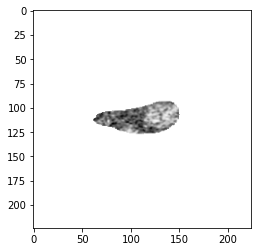

In [7]:
# Confirming images loaded in
plt.imshow(images[1], cmap='Greys')

In [8]:
# Training and testing split
train_slice, test_slice = pat_train_test_split(pat_num[:FILESTOLOAD], label[:FILESTOLOAD], 70, random_seed)